In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("/content/screentime_analysis.csv")

In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-21,Instagram,109,62,38
1,2024-08-25,Facebook,30,45,32
2,2024-08-17,Safari,19,1,7
3,2024-08-16,LinkedIn,25,12,5
4,2024-08-30,X,19,37,23


In [5]:
data.rename(columns={'Usage (minutes)': 'Usage_minutes', 'Times Opened': 'Times_Opened'}, inplace=True)

data.describe()

,Usage_minutes,Notifications,Times_Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [6]:
data.isnull().sum()

,0
Date,0
App,0
Usage_minutes,0
Notifications,0
Times_Opened,0


In [7]:
def detect_outliers(df):
  for column in df.columns:
    if df[column].dtype in ['int64', 'int32', 'float32', 'float64']:
      df[f'z_score_{column}'] = (df[column] - df[column].mean()) / df[column].std()
      outliers = df[np.abs(data[f'z_score_{column}']) > 3]
      df.drop(f'z_score_{column}', axis=1, inplace=True)
      return outliers

outliers = detect_outliers(data)
print(outliers)

Empty DataFrame
Columns: [Date, App, Usage_minutes, Notifications, Times_Opened, z_score_Usage_minutes]
Index: []


In [8]:
data['Date'] = pd.to_datetime(data['Date'])

data['day'] = data['Date'].dt.day

data.drop(['Date'], inplace=True, axis=1)

data.head()

,App,Usage_minutes,Notifications,Times_Opened,day
0,Instagram,109,62,38,21
1,Facebook,30,45,32,25
2,Safari,19,1,7,17
3,LinkedIn,25,12,5,16
4,X,19,37,23,30


In [9]:
apps = data['App'].unique()
apps

array(['Instagram', 'Facebook', 'Safari', 'LinkedIn', 'X', '8 Ball Pool',
       'Netflix', 'WhatsApp'], dtype=object)

In [10]:
entry_counts = data.groupby('App').count()
print(entry_counts)

             Usage_minutes  Notifications  Times_Opened  day
App                                                         
8 Ball Pool             25             25            25   25
Facebook                25             25            25   25
Instagram               25             25            25   25
LinkedIn                25             25            25   25
Netflix                 25             25            25   25
Safari                  25             25            25   25
WhatsApp                25             25            25   25
X                       25             25            25   25


<BarContainer object of 8 artists>

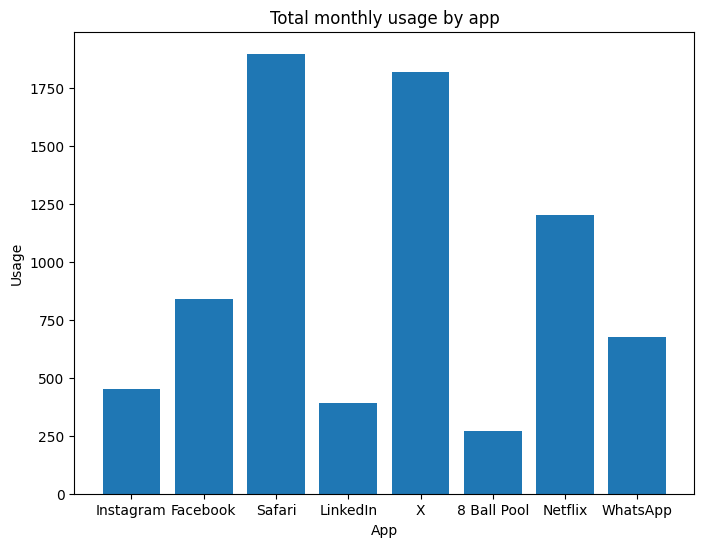

In [11]:
usage = data.groupby('App')['Usage_minutes'].sum()

plt.figure(figsize=(8, 6), label='Total usage by app')
plt.title('Total monthly usage by app')
plt.xlabel('App')
plt.ylabel('Usage')
plt.bar(apps, usage)

<BarContainer object of 8 artists>

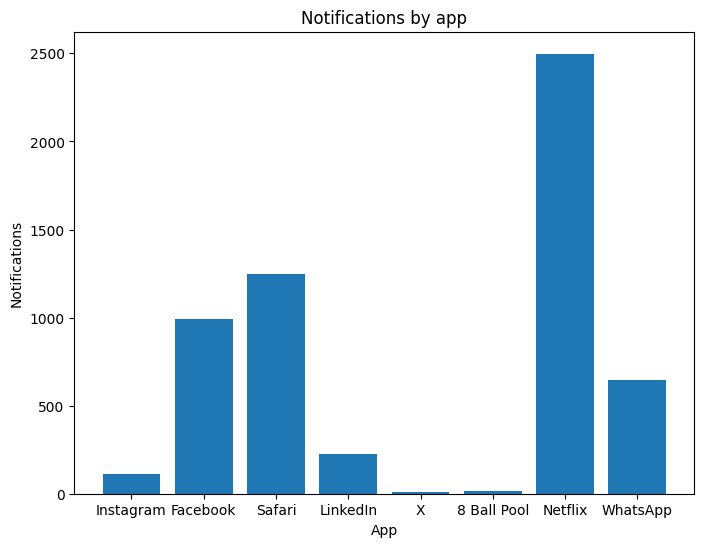

In [12]:
notifications_by_app = data.groupby('App')['Notifications'].sum()

plt.figure(figsize=(8, 6), label='Notifications by app')
plt.title('Notifications by app')
plt.xlabel('App')
plt.ylabel('Notifications')
plt.bar(apps, notifications_by_app)

<BarContainer object of 8 artists>

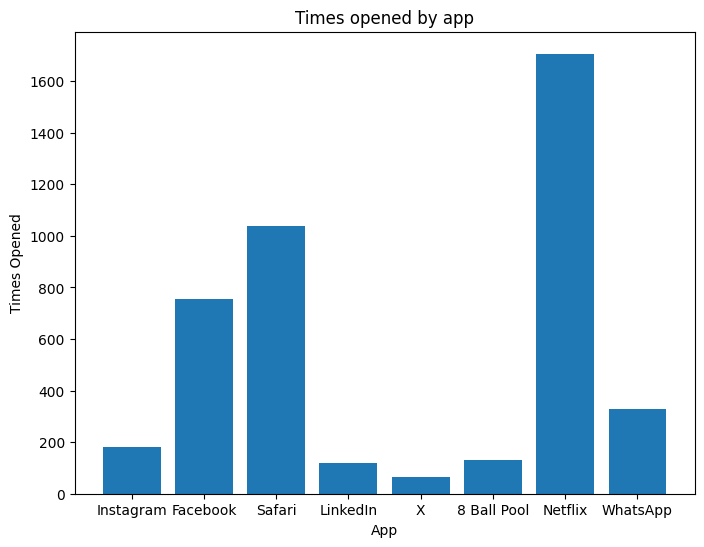

In [13]:
times_opened_by_app = data.groupby('App')['Times_Opened'].sum()
plt.figure(figsize=(8, 6), label='Times opened by app')
plt.title('Times opened by app')
plt.xlabel('App')
plt.ylabel('Times Opened')
plt.bar(apps, times_opened_by_app)

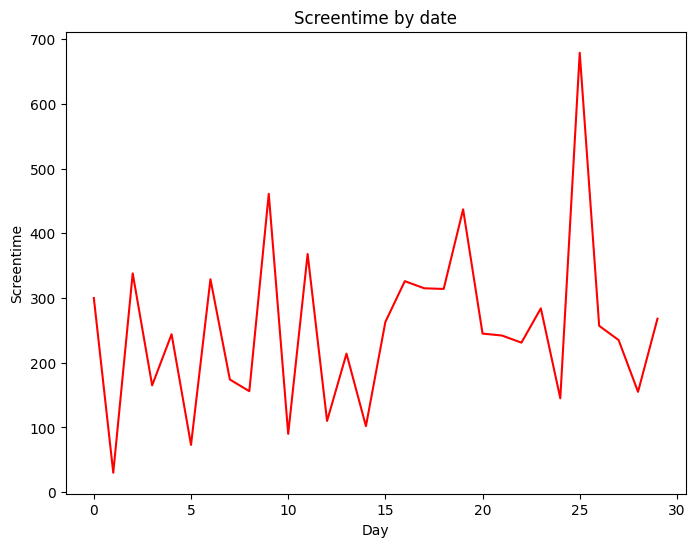

In [14]:
usage_by_date = data.groupby('day')['Usage_minutes'].sum()
plt.figure(figsize=(8, 6), label='Screentime by date')
plt.title('Screentime by date')
plt.xlabel('Day')
plt.ylabel('Screentime')
plt.plot([i for i in range(max(data['day']))], usage_by_date, color='red')